In [181]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

# Pandas Dataframes

2-dimensional data structure, similiar to spreadsheets, SQL-Tables, R-DF

## Initialisation 


### From Files by using utility functions

* pd.read_csv()
* pd.read_json()
* ...

> Default: Adds a index column, to use first column instead set <index_col> parameter

In [144]:
df = pd.read_csv(
        "./14111-0002.csv",     # path to file
        sep=";",                        # for csv, tsv, etc
        header=1,                     # how many header columns  
        index_col=0,                # force index
        decimal=","                  # sets decimal if not "."    
        )
df

,erststimmen,erststimmen_prozent,zweitstimmen,zweitstimmen_prozent
partei,,,,
SPD,12234690,26.4,11955434,25.7
CDU,10451524,22.5,8775471,18.9
GRUENE,6469081,14.0,6852206,14.8
FDP,4042951,8.7,5319952,11.5
AFD,4695611,10.1,4803902,10.3
CSU,2788048,6.0,2402827,5.2
LINKE,2307536,5.0,2270906,4.9


In [109]:
print(f'Query: <Erststimmen CDU> == {df["erststimmen"]["CDU"]}')

Query: <Erststimmen CDU> == 10451524


### From python Dictionaries

* Keys   -> Headers
* Values -> Array/Tuples of values

In [87]:
alt = pd.DataFrame(
        {
                "name" : ["anna", "tom", "lisa"],
                "age" : [17, 32, 63],
                "occupation" : ("farmer", "programmer", "sales")    
        }
)
alt

,name,age,occupation
0,anna,17,farmer
1,tom,32,programmer
2,lisa,63,sales


## Series

* A column inside the dataframe is called a __series__
* 1d numpy array

> Selection: df["header"]

*similiar to a python dictionary*

In [52]:
df["partei"]

0       SPD
1       CDU
2    GRUENE
3       FDP
4       AFD
5       CSU
6     LINKE
Name: partei, dtype: object

### Create and add a series to an existing df

In [100]:
grades = pd.Series([1.4, 3.2, 6.0],  name="grades")     # from python iterable

hobbys = pd.Series(
        np.array(["it", "swimming", "music"]),                  # from numpy array
        name = "hobbys"
)
grades

0    1.4
1    3.2
2    6.0
Name: grades, dtype: float64

## Add a series to dataframe

df = odf.assign(header_name = <series>, ...)
* returns a new df object! 

In [110]:
alt = alt.assign(final_grade = grades, main_hobby = hobbys)
alt

,name,age,occupation,final_grade,main_hobby
0,anna,17,farmer,1.4,it
1,tom,32,programmer,3.2,swimming
2,lisa,63,sales,6.0,music


## Descriptive Statistics

1. on dataframe 

In [138]:
d_df = df.describe()    # returns a new dataframe that describes df
d_df

,erststimmen,erststimmen_prozent,zweitstimmen,zweitstimmen_prozent
count,7.000000e+00,7.000000,7.000000e+00,7.000000
mean,6.141349e+06,13.242857,6.054385e+06,13.042857
std,3.835145e+06,8.269393,3.478862e+06,7.475707
min,2.307536e+06,5.000000,2.270906e+06,4.900000
25%,3.415500e+06,7.350000,3.603364e+06,7.750000
50%,4.695611e+06,10.100000,5.319952e+06,11.500000
75%,8.460302e+06,18.250000,7.813838e+06,16.850000
max,1.223469e+07,26.400000,1.195543e+07,25.700000


2. on series

In [139]:
print(
        df["zweitstimmen"].sum(),
        df["zweitstimmen"].min(),
        df["zweitstimmen"].max(),
        df["zweitstimmen"].mean(),
)   

42380698 2270906 11955434 6054385.428571428


In [203]:
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## Combine with matplotlib

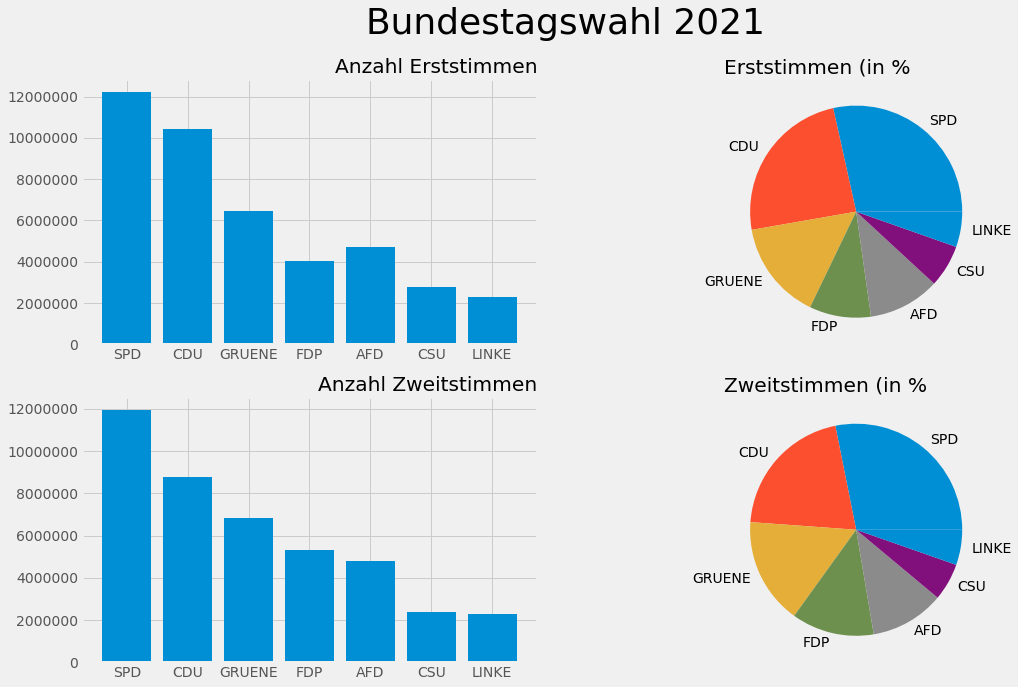

In [202]:
fig, axes = plt.subplots(nrows=2, ncols=2)

# erststimmen
axes[0][0].bar(df.index, df["erststimmen"])
axes[0][0].set_title("Anzahl Erststimmen", loc="right")
axes[0][0].yaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))    # use a formatter for standard int notation instead of scientific

axes[0][1].pie(df["erststimmen_prozent"], labels=df.index)
axes[0][1].set_title("Erststimmen (in %", loc="left")

# zweitstimmen
axes[1][0].bar(df.index, df["zweitstimmen"])
axes[1][0].set_title("Anzahl Zweitstimmen", loc="right")
axes[1][0].yaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))

axes[1][1].pie(df["zweitstimmen_prozent"], labels=df.index)
axes[1][1].set_title("Zweitstimmen (in %", loc="left")

fig.suptitle("Bundestagswahl 2021", fontsize=36)                # figure super title
fig.set_size_inches(16,10)
plt.style.use(  'seaborn-notebook')
